## Computer Vision

컴퓨터비전은 이미지 뿐 아니라 비디오 등과 같은 모든 Task를 포함한다. 여기에 모델을 적용하려면 딥러닝 모델중 CNN을 사용해야 한다. CNN에는 특징 추출 층이 있기 때문이다.

## Data Augmentation

복잡한 모델을 만들기 위해서는 다량의 데이터가 필요하다. 하지만 데이터의 갯수는 한정적이다. 따라서 이를 보완하기 위해 Data Augmentation이 필요하다. Data Augmentation은 데이터를 임의로 변형해 데이터의 수를 늘려 다양한 Feature를 뽑는 방법이다. 일반적으로 이미지 분류 문제에 Data Augmentaiton을 할 경우 성능이 소폭 상승한다고 알려져 있다.


- Random Flip, Rotation, Crop, Scaling<br>
: Flip은 반전을 의미한다. 이미지를 랜덤하게 좌우 또는 상하 반전시키는 Random Flip이다. Rotation은 회전을, Crop은 일정 부분을 잘라내는 기법이다. Scaling은 이미지를 확대 또는 축소 시키는 방법이다.

- Cutout, Cutmix<br>
: Cutout은 이미지의 일부를 사각형 모양으로 검은색을 칠하는 기법이다. 숫자로 이야기 하면 0을 채워 넣는 것이다. Cutmix는 두 이미지를 합쳐놓은 기법이라고 이해하면 된다.

밑의 사진은 'CutMix: Regularization Strategy to Train Strong Classifiers with Localizable Features' 논문에서 발췌한 예시 사진이다.

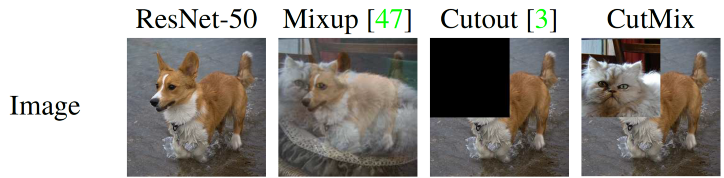

### [예제 4-3] CIFAR-10 데이터에 Augmentation 기법을 이용해 모델의 성능 향상시키기

In [16]:
train = datasets.CIFAR10(root='data/',train=True,
                             download=True, transform = transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

                         
test = datasets.CIFAR10(root='data/',train=False,
                            transform = transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset=train,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test,
                                         batch_size=BATCH_SIZE,
                                         shuffle = False)

Files already downloaded and verified


In [17]:
#8. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test Accuracy를 확인하자.
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("|n[EPOCH :{}], Test Loss : {:.4f}, Test Accuracy : {:.2f} ".
         format(Epoch, test_loss, test_accuracy))

TypeError: 'CIFAR10' object is not callable

- transforms.Compose()<br>
: 이미지 전처리 밑 Augmentation을 다양하게 적용할 때 이용하는 메서드이다. 즉, Compose의 괄호 안에 있는 처리 과정을 거친 데이터를 불러오는 것이다.

- RandomHorizontalFlip()<br>
: 해당 이미지를 50% 확률로 좌우 반전하는 것을 의미한다.

- ToTensor()<br>
: 0에서 1사이의 값으로 정규화하며 딥러닝 모델의 input이 될 수 있도록 Tensor 형태로 변환시켜주는 전처리 과정이다.

- Normalized()<br>
: ToTensor() 형태로 전환된 이미지에 대해 또 다른 정규화를 진행하는 것을 의미하는데 이때는 평균과 표준편차를 red,green,blue 순으로 평균 0.5씩 적용하는 것을 의미한다.

## CNN Architecture

- ImageNet<br>
: 이미지 분류 모델을 측정하기 위한 데이터로 가장 많이 사용하는 데이터셋이다. 학습 데이터는 총 138GB으로 총 2만 개 이상의 클래스와 약 1400만장의 이미지로 구성돼 있다. 

- LeNet<br>
: Yann LeCun 교수가 제안한 최초의 CNN 모델이다. 32 x 32 input과 convolution Layer 2개, pooling Layer 2개, Fully Connected Layer 3개를 가지고 있는데 이 구조는 가장 기본적인 CNN 구조로 사용되고 있다.
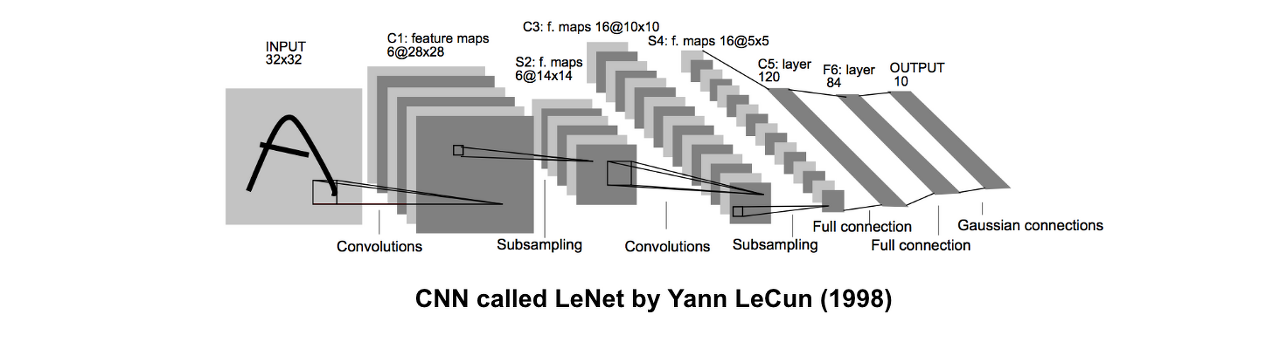

- AlexNet<br>
: LeNet과 크게 다르지 않다. 224 x 224 크기의 RGB 3 channel image를 input으로 사용했다. Activation Function은 ReLU를 사용했으며 Dropout과 Data Augmentation 등을 적용하였다.
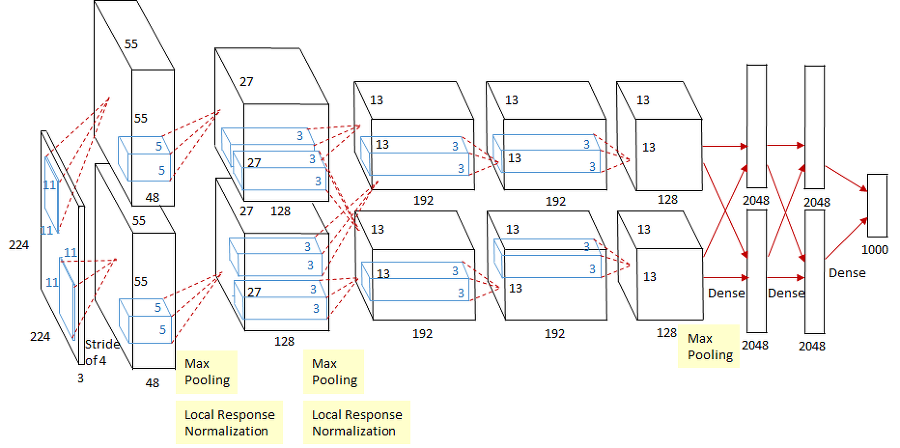

- VGG<br>
: 3 x 3 convolution layer를 깊게 중첩한다는 것이 vgg 모델의 큰 특징이다. layer의 깊이에 따라 vgg16, vgg19로 불리고 있다.
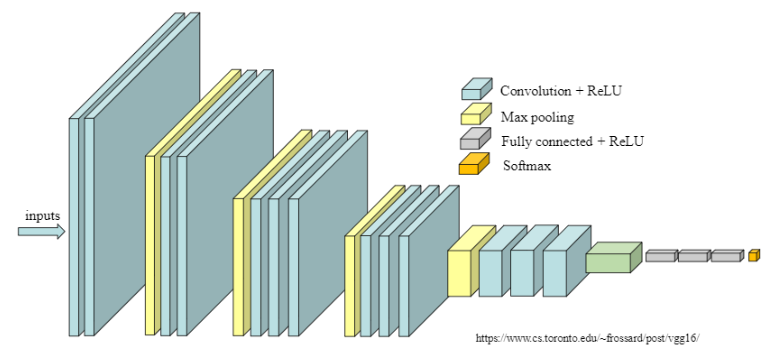

- GoogLeNet<br>
: Inception Mdoel로도 불린다. 구글에서 제안한 모델로 google + lenet을 합친 말이다.
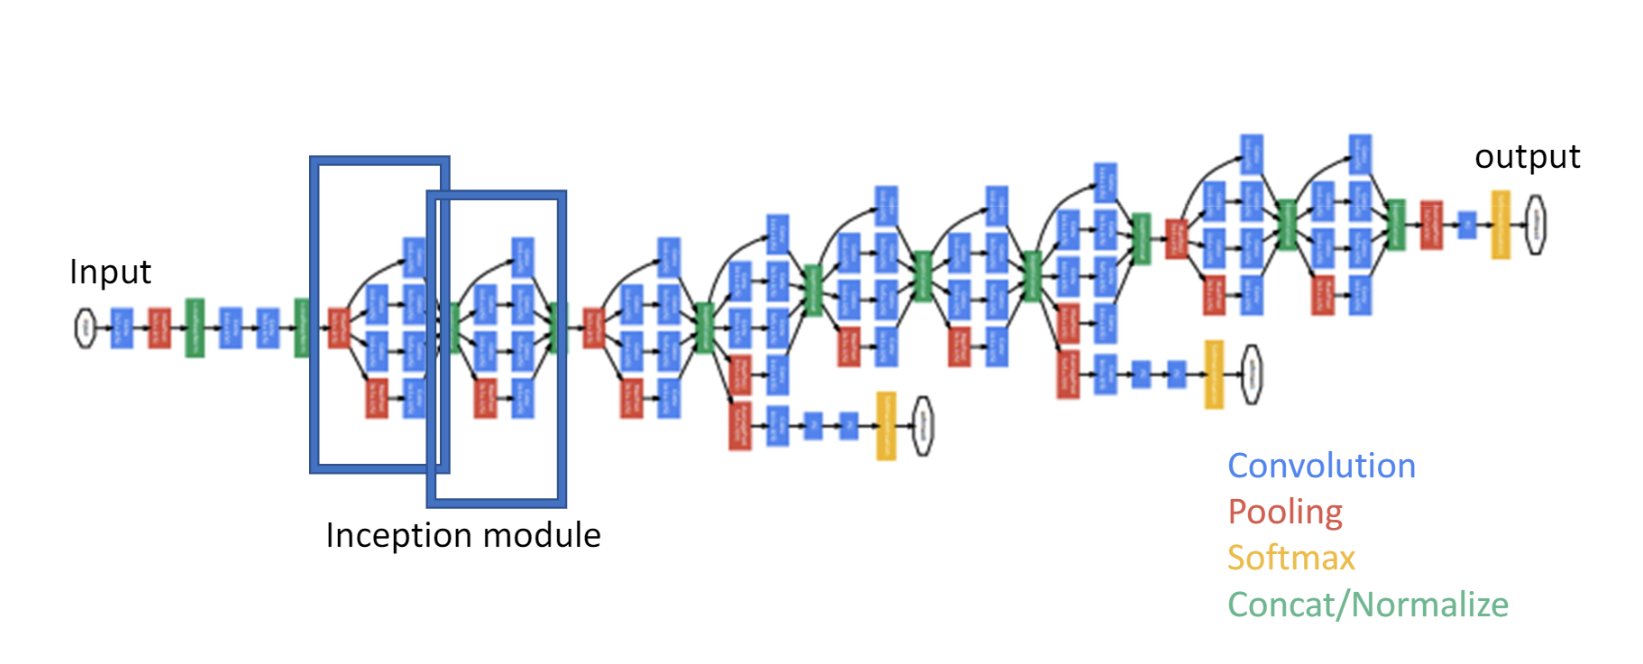

- ResNet<br>
: Residual Network의 약쟈로 마이크로소프트에서 제안한 모델이다. 
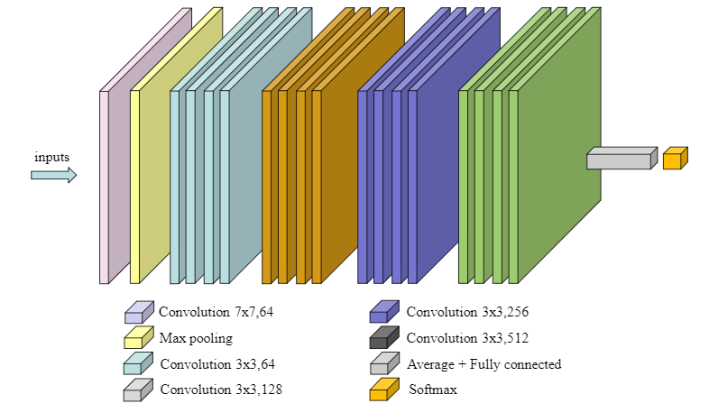

- DenseNet<br>
: ResNet의 확장된 버전으로 ResNet은 이전 layer와 다음 layer에 Skip Connection을 적용하는 모델이라면 DenseNet은 모든 Layer에 Skip Connection을 적용하는 모델이다.
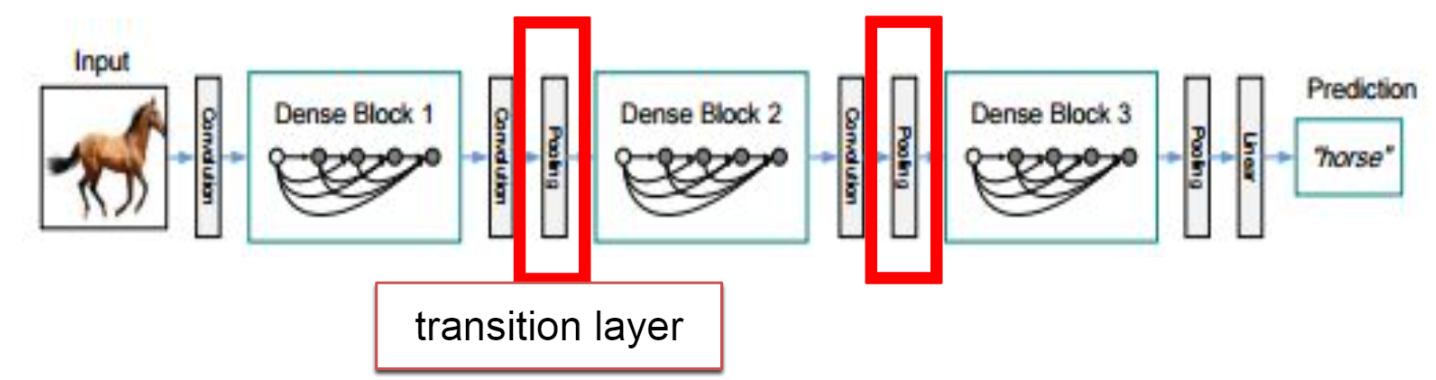

### [예제 4-4] CIFAR-10 데이터에 고급 CNN 모델 적용해 성능 향상시키기

In [34]:
class BasicBlock(nn.Module):
    def __init__(self, in_planes, planes, stride = 1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes,
                              kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes,
                              kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        # 기존의 값과 Convolution 및 Batch Normalization한 결과를 더하는 과정을 의미한다.
        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
            nn.Conv2d(in_planes, planes,
                    kernel_size=1, stride=stride, bias=False),
            nn.BatchNorm2d(planes))
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 16
        
        self.conv1 = nn.Conv2d(3,16,
                              kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self.__make_layer(16,2,stride=1)
        self.layer2 = self.__make_layer(32,2,stride=2)
        self.layer3 = self.__make_layer(64,2,stride=4)
        self.linear = nn.Linear(64, num_classes)
       
    def __make_layer(self, planes, num_blocks, stride):
        strides = [stride] + [1]* (num_blocks - 1)
        layers = []
        for stride in strides :
            layers.append(BasicBlock(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out)
        out = out.view(out.size(0),-1)
        out = self.linear(out)
        return out

ResNet 모델은 내부에 반복적으로 이용하는 Block을 바탕으로 구성되어 있다.

In [41]:
train = datasets.CIFAR10(root='../data/CIFAR_10',train=True,
                             download=True, transform = transforms.ToTensor())
test = datasets.CIFAR10(root='../data/CIFAR_10',train=False,
                            transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test,
                                         batch_size=BATCH_SIZE,
                                         shuffle = False)

Files already downloaded and verified


In [42]:
model = ResNet().to(DEVICE)

In [43]:
#8. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test Accuracy를 확인하자.
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("|n[EPOCH :{}], Test Loss : {:.4f}, Test Accuracy : {:.2f} ".
         format(Epoch, test_loss, test_accuracy))

TypeError: 'CIFAR10' object is not callable

## Transfer Learning

미리 학습해 놓은 딥러닝 모델을 가져와 재학습 시키는 방법을 사용한다. 이런 방법을 전이 학습이라고 한다. Pre-trained model은 기본적으로 파이토치에서 다운로드해 사용할 수 있다.

1. pre_trained = True, freezing = True<br>
: 모형의 초기 가중치를 학습 되어 있는 모형의 가중치로 쓰는 방법이다. 데이터셋이 크고 많은 때 사용이 유용하다. 계속 parameter를 업데이트 하기 때문에 두번째 모형보다 시간이 오래 걸린다.

2. pre_trained = True, freezing = False<br>
: 모형의 가중치를 학습 되어 있는 모형의 가중치를 쓰고, 업데이트를 하지 않는 방법이다. classifier 부분의 가중치만 가지고 있는 데이터에 맞게 변형된다. 따라서 첫번째 모형보다 시간이 빠르다. 데이터셋이 작을수록 일반적으로 더 효과적이다.

3. pre_trained = False<br>
: 모형의 틀만 가져오고 초기값은 난수로 발생시키는 방법이다.

### [예제 4-6] 대용량의 데이터를 이용해 학습이 완료된 모델을 적은 수의 데이터에 맞게 fine_tuning하는 Transfer Learning 실습하기

데이터는 개미 이미지와 벌 이미지 200장

#### 1. Module Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

#### 2. Using GPU

In [2]:
#2. 딥러닝 모델을 설계할 때 활용하는 cuda 확인
if torch.cuda.is_available():
    DEVICE = torch.device('cuda:0')
else :
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version : ', torch.__version__, '  Device : ', DEVICE)

Using PyTorch version :  1.8.0   Device :  cuda:0


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

#### 3. Download image

In [8]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ]),
    'val': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
    ]),
}

In [11]:
image_datasets = { x : datasets.ImageFolder("./hymenoptera_data",
                                           data_transforms[x]) for x in
                  ['train','val']}
dataloaders = { x : torch.utils.data.DataLoader(image_datasets[x],
                batch_size = BATCH_SIZE,
                num_workers = 0, # 멀티 프로세싱 진행 x
                shuffle = True) for x in ['train','val']}

In [12]:
image_datasets

{'train': Dataset ImageFolder
     Number of datapoints: 397
     Root location: ./hymenoptera_data
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 'val': Dataset ImageFolder
     Number of datapoints: 397
     Root location: ./hymenoptera_data
     StandardTransform
 Transform: Compose(
                CenterCrop(size=(224, 224))
                Resize(size=256, interpolation=bilinear)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            )}

In [13]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2998dc3fe50>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x2998dc5e640>}

#### 4. Confirm Data

In [15]:
for (X_train, y_train) in dataloaders['train']:
    print('X_train :', X_train.size(), 'Type :', X_train.type())
    print('y_train :', y_train.size(), 'Type :', y_train.type())
    break

X_train : torch.Size([32, 3, 224, 224]) Type : torch.FloatTensor
y_train : torch.Size([32]) Type : torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

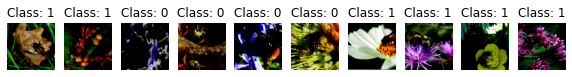

In [19]:
pltsize = 1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i],(1,2,0)))
    plt.title('Class: ' + str(y_train[i].item()))

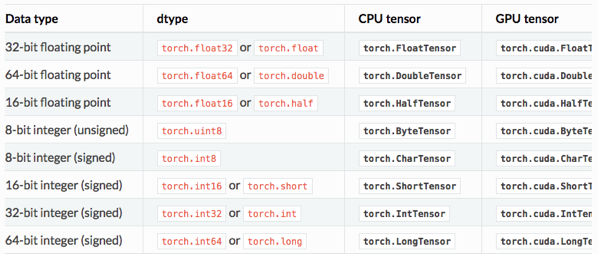

#### 5. Function define

In [23]:
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image,label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]|tTrain Loss: {:.6f}".format(
            Epoch, batch_idx * len(image),
            len(train_loader.dataset), 100*batch_idx/len(train_loader),
            loss.item()))

In [24]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output,label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
        test_loss /= len(test_loader.dataset)
        test_accuracy = 100. * correct / len(test_loader.dataset)
        return test_loss, test_accuracy

In [25]:
import torchvision.models as models
model = models.resnet18(pretrained=False).cuda()
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

In [26]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
for Epoch in range(1, EPOCHS+1):
    train(model, dataloaders['train'], optimizer, log_interval=5)
    test_loss, test_accuracy = evaluate(model, dataloaders['val'])
    print("\n[EPOCH:{}],\tTest Loss : {:.4f}, \tTest Accuracy : {:.2f} % \n".format
         (Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/397(0%)]|tTrain Loss: 0.835421
Train Epoch: 1 [160/397(38%)]|tTrain Loss: 0.719310
Train Epoch: 1 [320/397(77%)]|tTrain Loss: 0.721900

[EPOCH:1],	Test Loss : 0.0220, 	Test Accuracy : 60.71 % 

Train Epoch: 2 [0/397(0%)]|tTrain Loss: 0.616022
Train Epoch: 2 [160/397(38%)]|tTrain Loss: 0.793800
Train Epoch: 2 [320/397(77%)]|tTrain Loss: 0.813657

[EPOCH:2],	Test Loss : 0.0235, 	Test Accuracy : 50.88 % 

Train Epoch: 3 [0/397(0%)]|tTrain Loss: 0.745587
Train Epoch: 3 [160/397(38%)]|tTrain Loss: 0.740604
Train Epoch: 3 [320/397(77%)]|tTrain Loss: 0.612337

[EPOCH:3],	Test Loss : 0.0214, 	Test Accuracy : 61.71 % 

Train Epoch: 4 [0/397(0%)]|tTrain Loss: 0.664886
Train Epoch: 4 [160/397(38%)]|tTrain Loss: 0.669919
Train Epoch: 4 [320/397(77%)]|tTrain Loss: 0.691278

[EPOCH:4],	Test Loss : 0.0210, 	Test Accuracy : 64.99 % 

Train Epoch: 5 [0/397(0%)]|tTrain Loss: 0.595369
Train Epoch: 5 [160/397(38%)]|tTrain Loss: 0.612517
Train Epoch: 5 [320/397(77%)]|tTrain Loss: 0.680778